In [1]:
import AssetManagerMachineLearning as aml
import numpy as np, pandas as pd, matplotlib.pyplot as plt

### Denoising and Detoning

Maecenko-Pastur pdf

In [2]:
N = 1000
T = 10000
x = np.random.normal(0, 1, size = (T, N))
cor = np.corrcoef(x, rowvar=0) # cor.shape = (1000,1000). If rowvar=1 - row represents a var, with observations in the columns.
eVal0 , eVec0 = aml.getPCA( cor )
pdf0 = aml.mpPDF(1., q=x.shape[0]/float(x.shape[1]), pts=N)
pdf1 = aml.fitKDE(np.diag(eVal0), bWidth=.005) #empirical pdf

<Axes: >

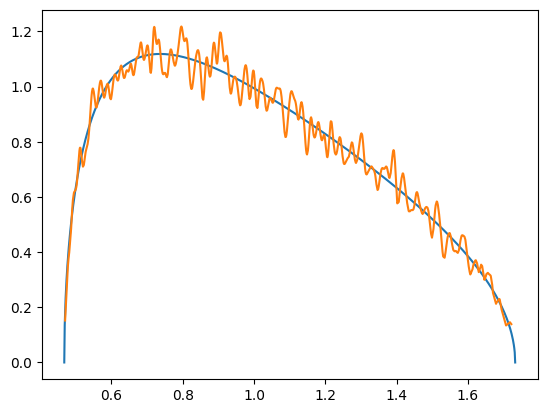

In [3]:
pdf0.plot()
pdf1.plot()

In [4]:
# code snippet 2.3 - random matrix with signal
alpha, nCols, nFact, q = .995, 1000, 100, 10
pdf0 = aml.mpPDF(1., q = x.shape[0]/float(x.shape[1]), pts = N)
cov = np.cov(np.random.normal(size = (nCols*q, nCols)), rowvar = 0) #size = (1000*10,1000)
cov = alpha * cov+(1 - alpha) * aml.getRndCov(nCols, nFact) # noise + signal
corr0 = aml.cov2corr(cov)
eVal01, eVec01 = aml.getPCA(corr0)
pdf2 = aml.fitKDE(np.diag(eVal01), bWidth=.15) #empirical pdf

<Axes: >

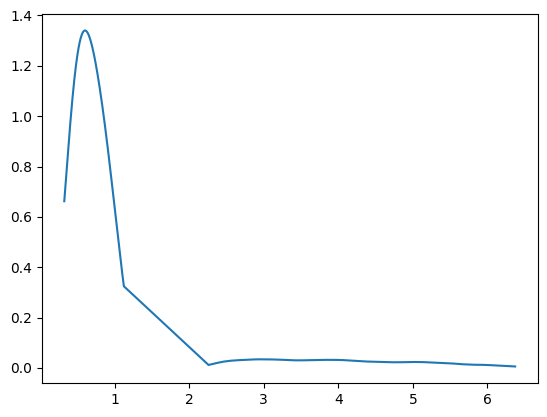

In [5]:
pdf2.plot()

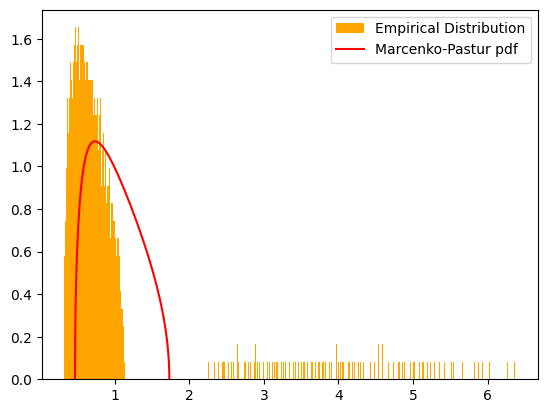

In [6]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(np.diag(eVal01), density = True, bins = 500, label = "Empirical Distribution", color = 'orange') # Histogram the eigenvalues

plt.plot(pdf0.keys(), pdf0, color = 'red', label = "Marcenko-Pastur pdf")
#plt.plot(pdf1.keys(), pdf1, color='g', label = "Empirical:KDE")
#plt.plot(pdf2, color='b', label="Eigenvalues of random-matrix with signal")
plt.legend(loc="upper right")
plt.show()

In [7]:
eMax0, var0 = aml.findMaxEval(np.diag(eVal01), q, bWidth=.01)
nFacts0 = eVal01.shape[0]-np.diag(eVal01)[::-1].searchsorted(eMax0)

sse:745.4310893414764
sse:745.4309958302205
sse:287.7685969697005
sse:287.76859337441647
sse:280.3061681839513
sse:280.30617263117773
sse:235.68405256154966
sse:235.68406020281557
sse:114.96419135269187
sse:114.96416286054375
sse:183.0543240765739
sse:183.05433358855583
sse:19.186987530974474
sse:19.186990617727705
sse:7036642712506.261
sse:7022590508897.954
sse:1229.8605698712804
sse:1229.8604309013294
sse:17.757410800800802
sse:17.757410673301877
sse:287.7685969697005
sse:287.76859337441647
sse:17.761978126188936
sse:17.761978348990098
sse:17.755221874083468
sse:17.75522187408617
sse:17.7552218740838
sse:17.755221874083798
sse:17.75522187408333
sse:17.755221874085432
found errPDFs0.6774355948269576


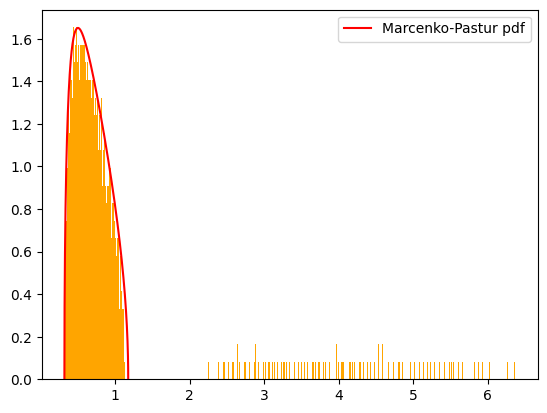

In [8]:
pdf0 = aml.mpPDF(var0, q=x.shape[0]/float(x.shape[1]), pts=N)
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(np.diag(eVal01), color = 'orange', density = True, bins=500) # Histogram the eigenvalues

plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")
#plt.plot(pdf1.keys(), pdf1, color='g', label="Empirical:KDE")
#plt.plot(pdf2, color='b', label="Eigenvalues of random-matrix with signal")
plt.legend(loc="upper right")
plt.show()

In [9]:
corr1 = aml.denoisedCorr(eVal01, eVec01, nFacts0)
eVal1, eVec1 = aml.getPCA(corr1)

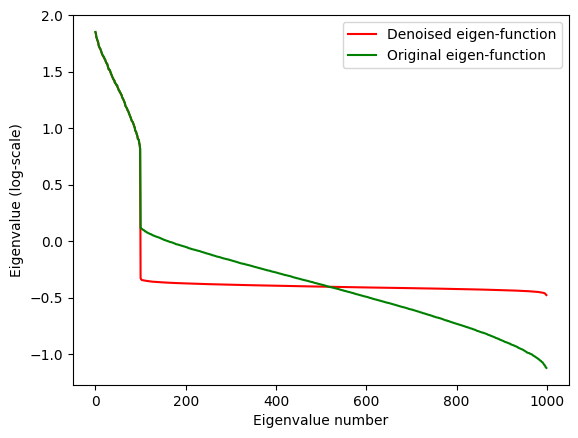

In [10]:
denoised_eigenvalue = np.diag(eVal1)
eigenvalue_prior = np.diag(eVal01)
plt.plot(range(0, len(denoised_eigenvalue)), np.log(denoised_eigenvalue), color='r', label="Denoised eigen-function")
plt.plot(range(0, len(eigenvalue_prior)), np.log(eigenvalue_prior), color='g', label="Original eigen-function")
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue (log-scale)")
plt.legend(loc="upper right")
plt.show()

In [11]:
nBlocks, bSize, bCorr = 2, 2, .5
np.random.seed(0)
mu0, cov0 = aml.formTrueMatrix(nBlocks, bSize, bCorr)

In [12]:
nObs, nTrials, bWidth, shrink, minVarPortf = 5, 5, .01, False, True
w1 = pd.DataFrame(columns = range(cov0.shape[0]), index = range(nTrials), dtype=float)

In [13]:
w1_d = w1.copy(deep=True)
np.random.seed(0)
for i in range(nTrials):
    mu1, cov1 = aml.simCovMu(mu0, cov0, nObs, shrink = shrink)
    if minVarPortf: mu1 = None
    cov1_d = aml.deNoiseCov(cov1, nObs*1./cov1.shape[1], bWidth)
    w1.loc[i] = aml.optPort(cov1, mu1).flatten() # add column vector w as row in w1
    w1_d.loc[i] = aml.optPort(cov1_d, mu1).flatten() # np.sum(w1_d, axis=1) is vector of 1's. sum(np.sum(w1_d, axis=0)= nTrials
    # so minimum-variance-portfolio is 1./nTrials*(np.sum(w1_d, axis=0)) - but distribution not stationary

min_var_port = 1./nTrials*(np.sum(w1_d, axis=0))

sse:2424.5846954636527
sse:2424.5846443872133
sse:1609.286778473055
sse:1609.2867965757891
found errPDFs0.99999
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Jun 16 03:49:25 AM: Your problem has 4 variables, 2 constraints, and 0 parameters.
(CVXPY) Jun 16 03:49:25 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 16 03:49:25 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 16 03:49:25 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jun 16 03:49:25 AM: Compiling problem (target

In [14]:
#code snippet 2.11
w0 = aml.optPort(cov0, None if minVarPortf else mu0) # w0 true percentage asset allocation
w0 = np.repeat(w0.T, w1.shape[0], axis=0)

                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Jun 16 03:49:25 AM: Your problem has 4 variables, 2 constraints, and 0 parameters.
(CVXPY) Jun 16 03:49:25 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 16 03:49:25 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 16 03:49:25 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jun 16 03:49:25 AM: Compiling problem (target solver=OSQP).
(CVXPY) Jun 16 03:49:25 AM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing 

In [15]:
rmsd = np.mean((w1-pd.DataFrame(w0.reshape(5,4))).values.flatten()**2)**.5     #RMSE not denoised
rmsd_d = np.mean((w1_d-pd.DataFrame(w0.reshape(5,4))).values.flatten()**2)**.5 #RMSE denoised
print("RMSE not denoised:"+str( rmsd))
print("RMSE denoised:"+str( rmsd_d))

RMSE not denoised:0.2651389560211777
RMSE denoised:0.1484375643157755


denoise된 공분산행렬의 RMSE가 더 낮게 나온다

#### Exercise 1
2.6절에 설명된 잡음 제거 방법을 파이썬으로 구현하라

In [16]:
corr_detoned_denoised = aml.detoned_corr(corr1, eVal1, eVec1)

eVal1_detoned, eVec1_detoned = aml.getPCA(corr_detoned_denoised)
detoned_denoised_eigenvalue = np.diag(eVal1_detoned)
denoised_eigenvalue = np.diag(eVal1)
eigenvalue_prior = np.diag(eVal01)

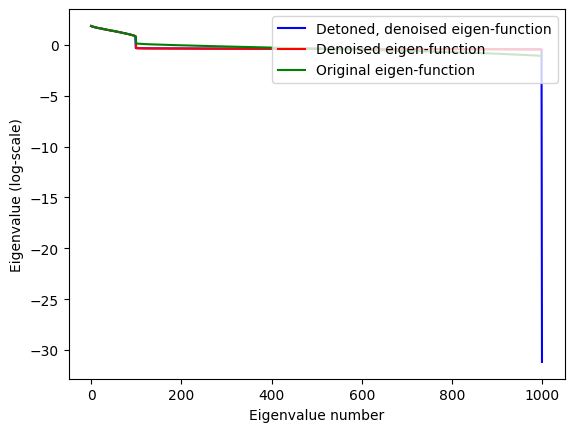

In [17]:
plt.plot(range(0, len(detoned_denoised_eigenvalue)), np.log(detoned_denoised_eigenvalue), color='b', label="Detoned, denoised eigen-function")
plt.plot(range(0, len(denoised_eigenvalue)), np.log(denoised_eigenvalue), color='r', label="Denoised eigen-function")
plt.plot(range(0, len(eigenvalue_prior)), np.log(eigenvalue_prior), color='g', label="Original eigen-function")
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue (log-scale)")
plt.legend(loc="upper right")
plt.show()

#### Exercise 2
일련의 주식 수익률 행렬을 사용한다

In [18]:
import pandas_datareader as web
start_date = '2019-01-22'
end_date = '2023-06-15'

kodex_etf = '069500' # KODEX 200
kospi200_etf = '069660'  # kiwoom KOSEF KOSPI 200
kosdaq150_etf = '316670'  # kiwoom KOSDAQ 150
samsung_code = '005930'  # Samsung
lg_code = '066570'  # LG
posco_code = '005490'  # POSCO

kodex = web.DataReader(kodex_etf, 'naver', start = start_date, end = end_date).astype(float).Close
kospi = web.DataReader(kospi200_etf, 'naver', start = start_date, end = end_date).astype(float).Close
kosdaq = web.DataReader(kosdaq150_etf, 'naver', start = start_date, end = end_date).astype(float).Close
samsung = web.DataReader(samsung_code, 'naver', start = start_date, end = end_date).astype(float).Close
lg = web.DataReader(lg_code, 'naver', start = start_date, end = end_date).astype(float).Close
posco = web.DataReader(posco_code, 'naver', start = start_date, end = end_date).astype(float).Close

<Axes: xlabel='Date'>

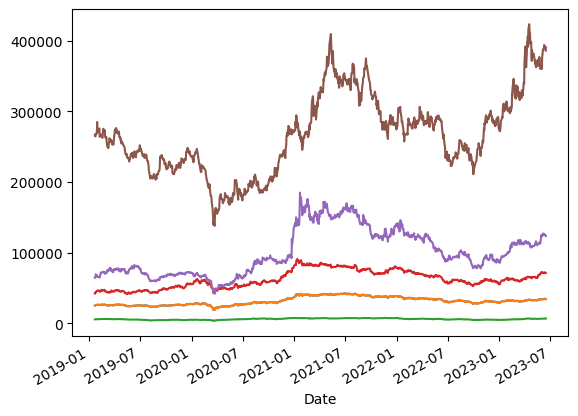

In [19]:
kodex.plot()
kospi.plot()
kosdaq.plot()
samsung.plot()
lg.plot()
posco.plot()

In [20]:
data = pd.concat([kodex, kospi, kosdaq, samsung, lg, posco], axis = 1)
data.columns = ['KODEX','KOSPI200','KOSDAQ150','Samsung','LG','Posco']
ret = np.log(data) - np.log(data.shift(1))
ret = ret.dropna()
ret

,KODEX,KOSPI200,KOSDAQ150,Samsung,LG,Posco
Date,,,,,,
2019-01-23,0.005735,0.004982,-0.004474,-0.003565,0.010794,-0.007519
2019-01-24,0.008226,0.008511,0.014955,0.024693,0.000000,-0.001889
2019-01-25,0.017993,0.018435,0.011246,0.038729,0.063867,0.013146
2019-01-28,-0.000542,-0.000310,0.007832,0.006682,-0.026241,0.003724
2019-01-29,0.004749,0.005020,-0.001735,0.009939,-0.004441,-0.001860
...,...,...,...,...,...,...
2023-06-09,0.013188,0.013186,0.014153,0.015396,-0.003954,0.015346
2023-06-12,-0.006500,-0.006789,0.003691,-0.013986,-0.004766,-0.006365
2023-06-13,0.004771,0.005204,0.019701,0.013986,-0.009600,-0.005122


**(a)** 공분산 행렬을 계산하라. 상관계수 행렬의 조건 수는 무엇인가?

In [21]:
covmat = ret.cov()
covmat

,KODEX,KOSPI200,KOSDAQ150,Samsung,LG,Posco
KODEX,0.000161,0.000161,0.000168,0.000172,0.000165,0.000151
KOSPI200,0.000161,0.000162,0.000168,0.000173,0.000165,0.000151
KOSDAQ150,0.000168,0.000168,0.000323,0.000150,0.000168,0.000141
Samsung,0.000172,0.000173,0.000150,0.000253,0.000153,0.000141
LG,0.000165,0.000165,0.000168,0.000153,0.000620,0.000156
Posco,0.000151,0.000151,0.000141,0.000141,0.000156,0.000443


In [22]:
codnum = np.linalg.cond(covmat)
codnum # 상관계수 행렬의 조건 수

3060.3087715262955

**(b)** 평균 10%와 표준편차 10%인 정규분포에서 100개의 대체 기대 수익률 벡터를 도출해서 Efficient Frontier 100개를 계산하라

In [23]:
def portfolio_annualised_performance(weights, day_returns, cov_matrix):
    returns = np.sum(day_returns.T.dot(weights)) *252
    std = np.sqrt(np.dot(weights, weights.dot(cov_matrix))) * np.sqrt(252)
    return std, returns

def random_portfolios(num_portfolios, day_returns, cov_matrix):
    '''
    Return performance of required number of random portfolios
    '''
    results = np.zeros((2,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        mu, sigma = 0.1, 0.1 # mean and standard deviation of the alternative vectors of expected returns
        weights = np.random.normal(mu, sigma, len(day_returns))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, day_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
    return results, weights_record

In [24]:
import scipy.optimize as opt
from tqdm.notebook import tqdm

def portfolio_volatility(weights, returns, cov_matrix):
    portfolio_returns = np.dot(returns.T, weights)
    portfolio_volatility = np.sqrt(np.dot(weights, np.dot(cov_matrix, weights)))
    return portfolio_volatility

def efficient_return(day_returns, cov_matrix, target): # target is the target value for returning the efficient frontier axis (similiar to a y-axis value )
    num_assets = len(day_returns)
    args = (day_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, day_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = opt.minimize(portfolio_volatility, num_assets*[1./num_assets,],
                          args = args, method = 'SLSQP', bounds = bounds, constraints=constraints)
    return result

def efficient_frontier(day_returns, cov_matrix, returns_range): # return efficient frontier
    efficients = []
    for ret in tqdm(returns_range, desc = 'calculating efficient frontier using optimization method:'):
        efficients.append(efficient_return(day_returns, cov_matrix, ret))
    return efficients

In [25]:
def ef_with_random_portfolio_opt(day_returns,cov_matrix,num_portfolios,ax = None,return_plot = True):
    cov_matrix = day_returns.T.cov()
    results, weights = random_portfolios(num_portfolios,day_returns, cov_matrix)

    target = np.linspace(max(np.min(results[1]),0), np.quantile(results[1],0.7), 30)
    efficient_portfolios = efficient_frontier(day_returns, cov_matrix, target)
    frontier = [p['fun'] for p in efficient_portfolios]

    if return_plot:
        if not ax:
            fig = plt.figure(figsize=(10, 7))
            ax = fig.add_subplot(111)

            #ax.legend(labelspacing=0.8)
        #ax.plot(frontier, target, color = 'black', linewidth = 2, label = 'efficient frontier')

        ax.scatter(results[0,:],results[1,:], marker='o', s=10, alpha=0.3)
        ax.set_title('Calculated Portfolio Optimization based on Efficient Frontier')
        ax.set_xlabel('annualised volatility')
        ax.set_ylabel('annualised returns')
        #ax.legend()

    return ax,[frontier,target]

calculating efficient frontier using optimization method::   0%|          | 0/30 [00:00<?, ?it/s]

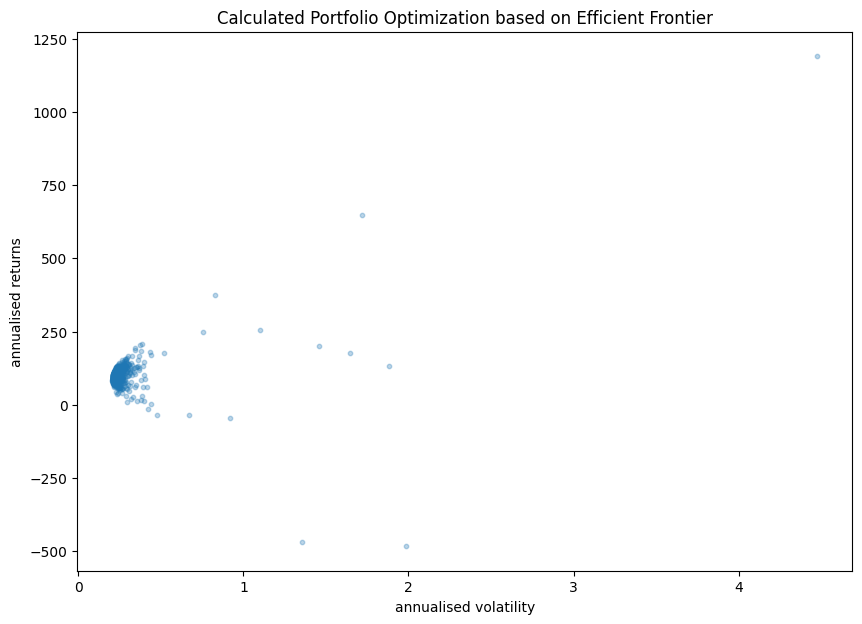

In [26]:
target_ret = ret.T # select 50 stocks to construct portfolio
target_cov = target_ret.cov()
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax,frontier_ret = ef_with_random_portfolio_opt(target_ret, target_cov, 1000, ax = ax)

In [27]:
def efficient_return_simu(results, target):

    # return efficient frontier
    # use +-5% area of the target, return the nearest min
    results = pd.DataFrame(results.T).sort_values(by = 1)
    closiest_idx = np.argmin(np.abs(results[1]-target))
    data_target = results[1][closiest_idx]
    target_range_min = min(data_target*0.95, data_target*1.05)
    target_range_max = max(data_target*0.95, data_target*1.05)
    sub_results = results.loc[(results[1] <= target_range_max) & (results[1] >= target_range_min),0:2]

    return min(sub_results[0])

def efficient_frontier_emp(day_returns, cov_matrix, num_portfolios,  returns_range, random_seed=0):
    efficients = []
    np.random.seed(random_seed)
    results, weights = random_portfolios(
        num_portfolios, day_returns, cov_matrix)
    for ret in returns_range:
        efficients.append(efficient_return_simu(results, ret))
    return efficients

def ef_with_random_portfolio_simu(day_returns, cov_matrix, num_portfolios, ax=None, return_plot=True, random_seed=0,mean_frontier = None):
    results, weights = random_portfolios(
        num_portfolios, day_returns, cov_matrix)

    #target_start = max(results[1][results[0]==np.min(results[0])][0],0)
    target_start = 0
    if True: #not return_plot:
        target_end = 400
    else:
        target_end = results[1][results[0]==np.max(results[0])][0]

    target = np.linspace(target_start, target_end, 30)
    efficient_portfolios = None
    efficient_portfolios = efficient_frontier_emp(day_returns, cov_matrix, num_portfolios, target, random_seed=random_seed)

    if return_plot:
        if not ax:
            fig = plt.figure(figsize=(10, 7))
            ax = fig.add_subplot(111)

            # ax.legend(labelspacing=0.8)
        #if mean_frontier:
            #ax.plot(mean_frontier[0], mean_frontier[1], color='black',linewidth=2, label='mean efficient frontier')
        #else:
            #ax.plot(efficient_portfolios, target, color='black',linewidth=2, label='efficient frontier')

        ax.scatter(results[0, :], results[1, :], marker='o', s=10, alpha=0.3)
        ax.set_title(
            'Calculated Portfolio Optimization based on Efficient Frontier')
        ax.set_xlabel('annualised volatility')
        ax.set_ylabel('annualised returns')
        #ax.legend()
    else:
        ax = None

    return ax, [efficient_portfolios, target]

In [31]:
def MC_ef_frontier(day_returns, cov_matrix, itertimes = 100, random_seed = 42):
    np.random.seed(random_seed)
    target_ret = pd.DataFrame(day_returns.T)
    target_cov = cov_matrix
    frontier = []
    for i in tqdm(range(itertimes)):
        ax,frontier_ret = ef_with_random_portfolio_simu(target_ret,target_cov,1000,return_plot = False,random_seed = i)
        frontier.append(frontier_ret[0])
    mean_frontier_vol = np.mean(frontier, axis = 0)
    mean_frontier_ret = frontier_ret[1]
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)
    ax,_ = ef_with_random_portfolio_simu(target_ret, target_cov, 1000, ax=ax,
                                         return_plot=True, random_seed = 42,
                                         mean_frontier = [mean_frontier_vol, frontier_ret[1]])
    return frontier

  0%|          | 0/100 [00:00<?, ?it/s]

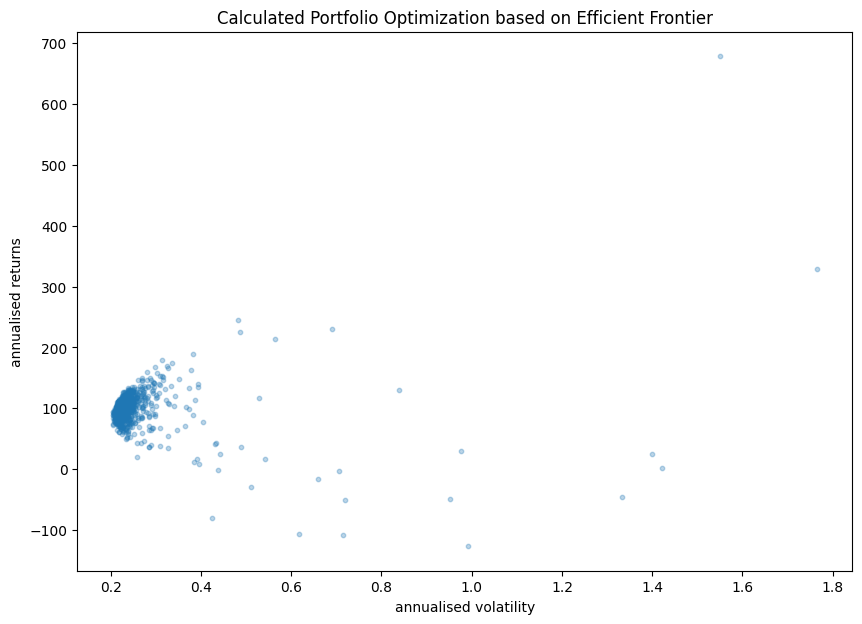

In [33]:
mean_frontier = MC_ef_frontier(ret, covmat, itertimes = 100, random_seed = 42)

**(c)** 평균 효율적 경계에 대한 오차의 분산을 계산하라

In [35]:
# variance of the errors against the mean efficient frontier
def error_mean_ef_frontier(frontiers, mean_frontier):
    err = []
    for frontier in frontiers:
        err.append(np.std(frontier-mean_frontier))
    return np.var(err)

error_mean_ef_frontier(frontier_ret, np.array(mean_frontier))

262.0549084890813

#### Exercise 3
Exercise 2를 반복한다. 여기서 이번에는 공분산 행렬의 잡음을 제거한 후 100개의 Efficient Frontier를 계산하라

sse:4082.0778699019834
sse:4082.077706135673
sse:1851.3707091477816
sse:1851.3707111744188
----------


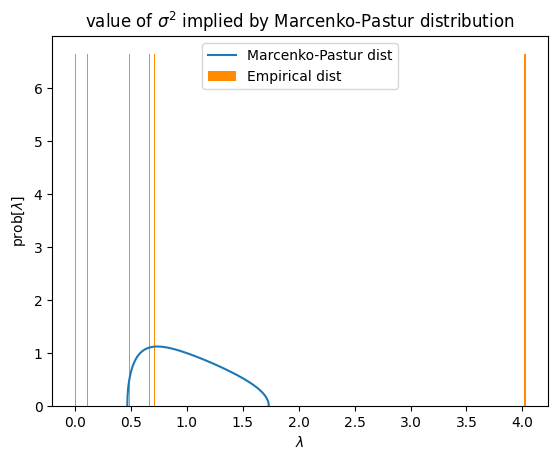

In [37]:
from scipy.optimize import minimize

def errPDFs(var, eVal, q, bWidth, pts = 1000):
    # Fit error
    var = var[0]
    pdf0 = aml.mpPDF(var, q, pts) # theoretical pdf
    pdf1 = aml.fitKDE(eVal, bWidth, x = pdf0.index.values) # empirical pdf
    #import pdb; pdb.set_trace()
    sse=np.sum((pdf1-pdf0)**2)
    return sse

corr3 = aml.cov2corr(covmat)
eVal3,eVec3 = aml.getPCA(corr3)
# Fitting the Marcenko–Pastur PDF on a noisy covariance matrix.
# estimate the sigma for Marcenko-Pastur dist
bWidth=0.01
out = minimize(lambda *x: aml.errPDFs(*x),.5,args=(np.diag(eVal3),q,bWidth),bounds=((1E-5,1-1E-5),))
if out['success']:
    var=out['x'][0]
else:
    var=1
print('-'*10)
pdf0 = aml.mpPDF(var, q, pts = 1000) # Marcenko-Pastur dist
pdf3 = aml.fitKDE(np.diag(eVal3),bWidth=.01) # empirical pdf
ax = plt.figure().add_subplot(111)
ax.plot(pdf0, label= 'Marcenko-Pastur dist')
ax.bar(pdf3.index,pdf3.values,width = bWidth,label= 'Empirical dist',color = 'darkorange')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'prob[$\lambda$]')
ax.set_title(r'value of $\sigma^2$ implied by Marcenko-Pastur distribution')
ax.legend()

**(a)** 마르첸코 - 파스퇴르 분포에서 암시하는 $\sigma^2$의 값은 무엇인가?

In [41]:
print(pdf0.var())

0.08005208547161317


마르첸코-파스퇴르 분포는 정상적인 행렬의 고유값 분포를 설명하는 분포로서, 주로 차원이 큰 상황에서 관찰되는 특성이다. 이 분포는 고유값들의 분포를 특징짓는데, 이는 주어진 행렬의 성질과 연관된다. 마르첸코-파스퇴르 분포의 분산은 주어진 표본공분산 행렬의 고유값들이 얼마나 분산되어 있는지를 나타낸다. 분산이 작을수록 고유값들이 집중되어 있음을 의미하며, 분산이 클수록 고유값들이 넓게 분포되어 있음을 의미한다. 이 분산은 행렬의 차원, 데이터의 특성, 공분산 행렬의 구조 등에 영향을 받는다.

마르첸코-파스퇴르 분포의 분산을 분석하면, 데이터의 주성분 개수를 결정하거나, 포트폴리오의 다양성을 평가하는 데 도움을 줄 수 있다. 또한, 분산을 이용하여 고유값들의 중요도를 평가하고, 데이터의 차원 축소를 수행하는 등의 다양한 응용이 가능하다.